# My Asteroids Classification project☄️ 

### Data Manipulation and Visualization

Hello and thank you for visiting my asteroids project. I'm trying to find out whether the orbits of asteroids can be classified.


Let's keep viewing our data and see if we can obtain any more information about it. Perhaps a few graphs will be of assistance.

<img src="images/Head.jpg" style="float:right;width:200px;height:100px;border-radius: 50%"/>



In [206]:
import pandas as pd
import numpy as np
import requests
from matplotlib import pyplot as plt
import requests

import seaborn as sns
import warnings

from astropy import units as u
from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit
from poliastro.plotting import OrbitPlotter3D


warnings.filterwarnings("ignore")

In [207]:
df_JPL = pd.read_csv("df_JPLfinal.csv")
df_JPL

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,H,diameter,NEO,PHA
0,2000001,1 Ceres (A801 AA),2.766,0.0782,10.59,80.27,73.72,2.550,2.98,4.60,3.5,939.400,0,0
1,2000002,2 Pallas (A802 FA),2.774,0.2298,34.85,172.97,310.29,2.137,3.41,4.62,4.2,545.000,0,0
2,2000003,3 Juno (A804 RA),2.668,0.2570,12.99,169.85,248.03,1.982,3.35,4.36,5.3,246.596,0,0
3,2000004,4 Vesta (A807 FA),2.362,0.0884,7.14,103.81,150.92,2.153,2.57,3.63,3.3,525.400,0,0
4,2000005,5 Astraea (A845 XA),2.574,0.1908,5.37,141.57,358.63,2.083,3.06,4.13,7.0,106.699,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424995,2424996,424996 (2009 CZ40),3.169,0.1102,9.40,140.76,273.09,2.820,3.52,5.64,16.0,3.900,0,0
424996,2424997,424997 (2009 CH45),2.987,0.1178,8.14,324.59,79.77,2.635,3.34,5.16,16.7,2.800,0,0
424997,2424998,424998 (2009 CU48),3.172,0.0740,11.88,307.42,319.26,2.937,3.41,5.65,16.0,4.756,0,0
424998,2424999,424999 (2009 CB58),3.148,0.0686,13.82,177.56,273.23,2.932,3.36,5.59,16.5,3.100,0,0


lets try to find some outliers for our variables in our data , we will try and find an outliers regarding only the most important variables in our data which defining our orbit **a**,**q**,**Q**,**e**,**i**,**node**,**peri**

In [208]:
df_JPL.describe(include='all')

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,H,diameter,NEO,PHA
count,4.250000e+05,425000,425000.000000,425000.000000,425000.000000,425000.000000,425000.000000,425000.000000,425000.000000,425000.000000,425000.000000,425000.000000,425000.000000,425000.000000
unique,NaN,425000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,139533 (2001 QW12),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.212500e+06,NaN,2.718184,0.141444,7.941426,168.057506,180.655737,2.329135,3.107228,4.822784,16.012092,96.708090,0.004292,0.001146
std,1.226871e+05,NaN,2.505583,0.072541,5.768835,102.701426,103.568562,0.935346,4.577950,62.308457,1.261569,263.955616,0.065371,0.033832
min,2.000001e+06,NaN,0.615900,0.000000,0.010000,0.000000,0.000000,0.082000,0.800000,0.483000,-1.100000,0.086000,0.000000,0.000000
25%,2.106251e+06,NaN,2.385000,0.088000,3.630000,80.230000,90.677500,2.002000,2.760000,3.680000,15.300000,1.800000,0.000000,0.000000
50%,2.212500e+06,NaN,2.630000,0.135800,6.400000,159.860000,181.250000,2.234000,2.990000,4.270000,16.100000,3.100000,0.000000,0.000000
75%,2.318750e+06,NaN,2.966000,0.186100,10.970000,250.670000,270.630000,2.586000,3.300000,5.110000,16.900000,5.300000,0.000000,0.000000


as we know **a** = (**q**+**Q**)/2 therefore we will handle this data the same

0
0
0


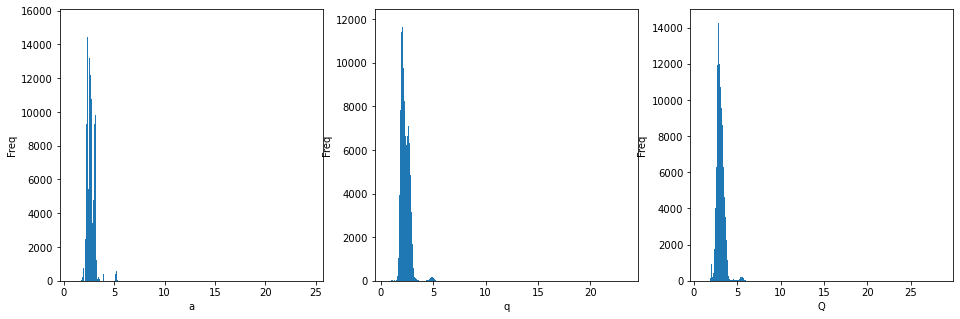

In [256]:
fig, axs = plt.subplots(1,3, figsize=(16,5))


axs[0].hist(df_JPL[df_JPL['a']<=30.1]['a'],bins=1000)
axs[0].set_xlabel('a')
axs[0].set_ylabel('Freq')
print(sum(df_JPL['a']>30.1))

axs[1].hist(df_JPL[df_JPL['q']<=30.1]['q'],bins=1000)
axs[1].set_xlabel('q')
axs[1].set_ylabel('Freq')
print(sum(df_JPL['q']>30.1))

axs[2].hist(df_JPL[df_JPL['Q']<=30.1]['Q'],bins=1000)
axs[2].set_xlabel('Q')
axs[2].set_ylabel('Freq')
print(sum(df_JPL['Q']>30.1))

later on we will see that an outlier will be when **a** is bigger then 30.1 because of an NASA definiton so i decided that i will delete evrey row that have this kind of data

In [210]:
df_JPL.drop(df_JPL[df_JPL['a']>30.1].index,axis=0,inplace=True)
df_JPL.drop(df_JPL[df_JPL['Q']>30.1].index,axis=0,inplace=True)
df_JPL.drop(df_JPL[df_JPL['q']>30.1].index,axis=0,inplace=True)

Now lets handle with **e** we want to check outliers using IQR method

In [211]:
df_JPL['e'].describe()

count    424729.000000
mean          0.141366
std           0.072282
min           0.000000
25%           0.088000
50%           0.135800
75%           0.186100
max           0.968500
Name: e, dtype: float64

In [212]:
Q1=np.percentile(df_JPL['e'],25)
Q3=np.percentile(df_JPL['e'],75)
IQR = Q3-Q1

In [213]:
e_outlier_rows = df_JPL[(df_JPL["e"] < Q1 - 1.5*IQR) | (df_JPL["e"] > Q3 + 1.5*IQR )].index
len(e_outlier_rows)

3994

<AxesSubplot:xlabel='e'>

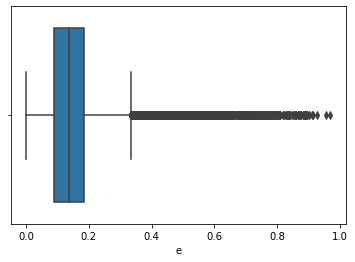

In [214]:
sns.boxplot(df_JPL['e'])

In [215]:
df_JPL.drop(e_outlier_rows,axis=0,inplace=True)
df_JPL

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,H,diameter,NEO,PHA
0,2000001,1 Ceres (A801 AA),2.766,0.0782,10.59,80.27,73.72,2.550,2.98,4.60,3.5,939.400,0,0
1,2000002,2 Pallas (A802 FA),2.774,0.2298,34.85,172.97,310.29,2.137,3.41,4.62,4.2,545.000,0,0
2,2000003,3 Juno (A804 RA),2.668,0.2570,12.99,169.85,248.03,1.982,3.35,4.36,5.3,246.596,0,0
3,2000004,4 Vesta (A807 FA),2.362,0.0884,7.14,103.81,150.92,2.153,2.57,3.63,3.3,525.400,0,0
4,2000005,5 Astraea (A845 XA),2.574,0.1908,5.37,141.57,358.63,2.083,3.06,4.13,7.0,106.699,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424995,2424996,424996 (2009 CZ40),3.169,0.1102,9.40,140.76,273.09,2.820,3.52,5.64,16.0,3.900,0,0
424996,2424997,424997 (2009 CH45),2.987,0.1178,8.14,324.59,79.77,2.635,3.34,5.16,16.7,2.800,0,0
424997,2424998,424998 (2009 CU48),3.172,0.0740,11.88,307.42,319.26,2.937,3.41,5.65,16.0,4.756,0,0
424998,2424999,424999 (2009 CB58),3.148,0.0686,13.82,177.56,273.23,2.932,3.36,5.59,16.5,3.100,0,0


we will use distance from mean with **peri**,**node** and **i**

Text(0, 0.5, 'Freq')

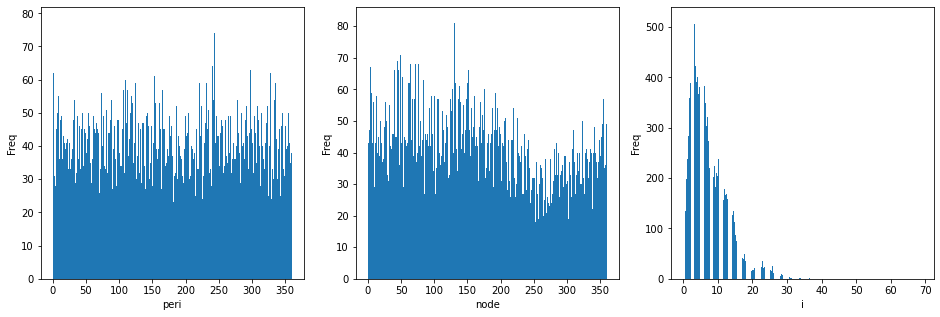

In [216]:
fig, axs = plt.subplots(1,3, figsize=(16,5))


axs[0].hist(df_JPL['peri'],bins=10000)
axs[0].set_xlabel('peri')
axs[0].set_ylabel('Freq')


axs[1].hist(df_JPL['node'],bins=10000)
axs[1].set_xlabel('node')
axs[1].set_ylabel('Freq')


axs[2].hist(df_JPL['i'],bins=10000)
axs[2].set_xlabel('i')
axs[2].set_ylabel('Freq')


for **peri** and **node** we can see we don't have any outliers but for i we do have a long tail we will refer to that

In [217]:
z_score_i = (df_JPL["i"] - df_JPL["i"].mean()) / df_JPL["i"].std()
outliers_i = abs(z_score_i) > 3
sum(outliers_i)

6714

In [218]:
df_JPL.drop(df_JPL.index[outliers_i],axis=0,inplace=True)
df_JPL

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,H,diameter,NEO,PHA
0,2000001,1 Ceres (A801 AA),2.766,0.0782,10.59,80.27,73.72,2.550,2.98,4.60,3.5,939.400,0,0
2,2000003,3 Juno (A804 RA),2.668,0.2570,12.99,169.85,248.03,1.982,3.35,4.36,5.3,246.596,0,0
3,2000004,4 Vesta (A807 FA),2.362,0.0884,7.14,103.81,150.92,2.153,2.57,3.63,3.3,525.400,0,0
4,2000005,5 Astraea (A845 XA),2.574,0.1908,5.37,141.57,358.63,2.083,3.06,4.13,7.0,106.699,0,0
5,2000006,6 Hebe (A847 NA),2.425,0.2033,14.74,138.64,239.71,1.932,2.92,3.78,5.7,185.180,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424995,2424996,424996 (2009 CZ40),3.169,0.1102,9.40,140.76,273.09,2.820,3.52,5.64,16.0,3.900,0,0
424996,2424997,424997 (2009 CH45),2.987,0.1178,8.14,324.59,79.77,2.635,3.34,5.16,16.7,2.800,0,0
424997,2424998,424998 (2009 CU48),3.172,0.0740,11.88,307.42,319.26,2.937,3.41,5.65,16.0,4.756,0,0
424998,2424999,424999 (2009 CB58),3.148,0.0686,13.82,177.56,273.23,2.932,3.36,5.59,16.5,3.100,0,0


ok now lets look at the picture below  

<img src="images/InnerSolarSystem-en.png" style="float:center;width:500px;height:500px;"/>

the white dots between Mars and Jupiter is the main asteroid belt the other white dots are other asteroids which we will try to classify to will be harder as a convention :

**q** -the major axis - is the point in the orbit of the asteroid when he is the nearest to the sun now if we look in the image above we can see that mmost asteroids will have the same **q** because they are in the area of the main belt we would like to try and use that to classify our orbits 

ok now if we look at the table below we would like to try and split our data and look how **q** is splited between the values below

<img src="images/distance drom sun.jpg" style="float:center;width:500px;height:500px;"/>

**a** is the average between **q** and **Q** ( let me remid that **Q** is the point where the asteroid is the farthest from the  sun ) :
$ a = (q+Q)/2 $ 


lets start by reaching to the asteroids in the main belt which 5.203>q>1.524

In [219]:
len(df_JPL[(df_JPL['q']>1.524) & (df_JPL['q']<5.203) ])

413424

as we can see above that is most of our data..

In [220]:
len(df_JPL[(df_JPL['q']<=1.3)])

328

this are all the asteroids which orbit is near earth , by convention a NEO if its closest approach to the Sun (perihelion/**q**) is less than 1.3 astronomical units (AU)


In [221]:
len(df_JPL[df_JPL['NEO']==1])

328

thus it meets our criterion

so lets divide **q** into bins when the bins are the values of the distace away from the sun 

the splits are between each circle in the image above!


Text(0.5, 0.98, 'the number of asteroids between different planets as nearest to sun')

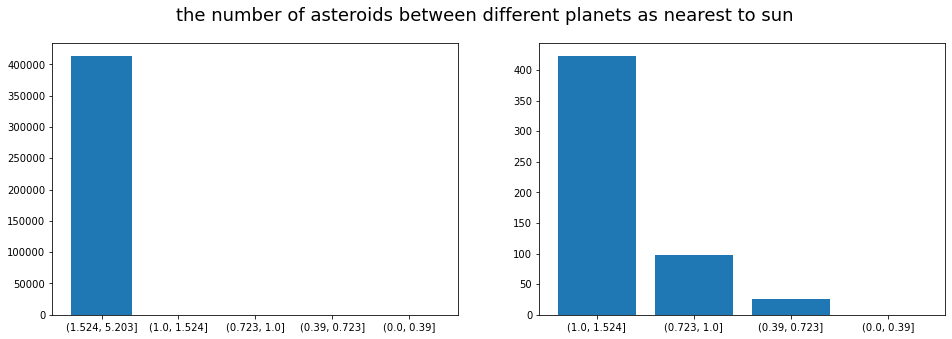

In [222]:
q_distribution = df_JPL.q.value_counts(bins = [0.001,0.39,0.723,1,1.524,5.203] ,normalize = False)
q_distribution1 = df_JPL.q.value_counts(bins = [0.001,0.39,0.723,1,1.524] ,normalize = False)
q_indexs = q_distribution.keys().astype('str')
q_indexs1 = q_distribution1.keys().astype('str')


fig, axs = plt.subplots(1,2, figsize=(16,5))

axs[0].bar(height=q_distribution,x=q_indexs )
axs[1].bar(height=q_distribution1,x=q_indexs1)

fig.suptitle('the number of asteroids between different planets as nearest to sun',fontsize = '18')

So i did two graphs because we cant see the values of other asteroids then the main-belt asteroids when we use all the range cause they are too much

as we can see in the graphs above it is clear that the most asteroids are in the main belt and in the 2nd place we have the asteroids that are between Earth and Mars

now if we look further at our variables , we have **Q** which states the farthest point in the orbit from the sun that means
that we can check if the value of this **Q** will be small enough it means that the orbit is small and this asteroid really close to the sun or other planet .

lets see how **Q** splits

In [223]:
df_JPL['Q'].describe(include='all')

count    414021.000000
mean          3.047540
std           0.470328
min           0.990000
25%           2.750000
50%           2.980000
75%           3.290000
max          28.450000
Name: Q, dtype: float64

In the following sentences, we will discuss certain NASA guidelines regarding the physical location of asteroids.

**These values will be added to the dataframe as a column, with '0' indicating that this specific asteroid orbit does not answer the cretria and '1' indicating that it does.**

we can see that its values are between 0.8<=**Q**<=2094.310
and we want values which are less 0.983au by convention those values means that the orbit is the nearest to Earth
**IEO = Interior Earth Object**

In [224]:
df_JPL['IEO'] = 0
df_JPL['IEO'][df_JPL['Q']<=0.983] = 1
df_JPL[df_JPL['Q']<=0.983]

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,H,diameter,NEO,PHA,IEO


we got only no orbits that are closest to earth for our data set..
i guess we sont need this column and will delete it

In [258]:
df_JPL.drop(labels=['IEO'],axis=1,inplace=True)
df_JPL

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,...,PHA,CEN,IMB,MBA,MCA,OMB,TJN,TNO,AST,M
0,2000001,1 Ceres (A801 AA),2.766,0.0782,10.59,80.27,73.72,2.550,2.98,4.60,...,0,0,0,1,0,0,0,0,0,205.545416
2,2000003,3 Juno (A804 RA),2.668,0.2570,12.99,169.85,248.03,1.982,3.35,4.36,...,0,0,0,1,0,0,0,0,0,170.711245
3,2000004,4 Vesta (A807 FA),2.362,0.0884,7.14,103.81,150.92,2.153,2.57,3.63,...,0,0,0,1,0,0,0,0,0,258.567830
4,2000005,5 Astraea (A845 XA),2.574,0.1908,5.37,141.57,358.63,2.083,3.06,4.13,...,0,0,0,1,0,0,0,0,0,65.612382
5,2000006,6 Hebe (A847 NA),2.425,0.2033,14.74,138.64,239.71,1.932,2.92,3.78,...,0,0,0,1,0,0,0,0,0,242.944820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424995,2424996,424996 (2009 CZ40),3.169,0.1102,9.40,140.76,273.09,2.820,3.52,5.64,...,0,0,0,1,0,0,0,0,0,103.361937
424996,2424997,424997 (2009 CH45),2.987,0.1178,8.14,324.59,79.77,2.635,3.34,5.16,...,0,0,0,1,0,0,0,0,0,172.179562
424997,2424998,424998 (2009 CU48),3.172,0.0740,11.88,307.42,319.26,2.937,3.41,5.65,...,0,0,0,1,0,0,0,0,0,263.203058
424998,2424999,424999 (2009 CB58),3.148,0.0686,13.82,177.56,273.23,2.932,3.36,5.59,...,0,0,0,1,0,0,0,0,0,105.943410


here is an image of an example of orbit :

<img src="images/near earth asteroid.jpg" style="float:center;width:700px;height:500px;"/>

now we need also to refer to **a** as an important variable to classify our orbits cause as we said before **a** is the average
between **q** and **Q** and by convention:

5.5au <=**a** <=30.1au are orbits which are between Jupiter and Neptune .

**CEN = Centaur** (Asteroids with orbit between Jupiter and Neptune)


In [225]:
CEN = (df_JPL['a']>5.5) & (df_JPL['a']<30.1)
df_JPL['CEN'] = 0
df_JPL['CEN'][CEN] = 1
df_JPL[(df_JPL['a']>5.5) & (df_JPL['a']<30.1)]

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,H,diameter,NEO,PHA,IEO,CEN
10198,2010199,10199 Chariklo (1997 CU26),15.840,0.1686,23.35,300.44,243.28,13.168,18.51,63.0,6.5,302.0,0,0,0,1
32531,2032532,32532 Thereus (2001 PT13),10.610,0.2006,20.37,205.22,87.02,8.480,12.73,34.5,9.0,86.5,0,0,0,1
49035,2049036,49036 Pelion (1998 QM107),19.990,0.1374,9.35,126.78,153.87,17.241,22.73,89.4,10.4,37.0,0,0,0,1
52871,2052872,52872 Okyrhoe (1998 SG35),8.373,0.3032,15.64,173.08,337.73,5.835,10.91,24.2,10.8,36.0,0,0,0,1
54597,2054598,54598 Bienor (2000 QC243),16.460,0.1991,20.75,337.71,153.16,13.179,19.73,66.8,7.5,187.5,0,0,0,1
63251,2063252,63252 (2001 BL41),9.851,0.2950,12.52,280.86,129.79,6.945,12.76,30.9,11.6,22.0,0,0,0,1
83981,2083982,83982 Crantor (2002 GO9),19.520,0.2756,12.75,117.37,94.03,14.139,24.90,86.2,8.9,77.0,0,0,0,1
95625,2095626,95626 (2002 GZ32),23.230,0.2246,15.00,107.31,155.82,18.012,28.45,112.0,6.9,230.5,0,0,0,1
119314,2119315,119315 (2001 SQ73),17.400,0.1786,17.44,16.16,303.58,14.289,20.50,72.6,9.6,53.0,0,0,0,1
136203,2136204,136204 (2003 WL7),20.040,0.2553,11.18,4.64,70.06,14.926,25.16,89.7,8.7,118.0,0,0,0,1


an orbit with **a**<2.0au and **q**>1.66au are inner main belt asteroids which means are in the inner part of the main belt closest to the sun .

**IMB = Inner Main-Belt Asteroid**

In [226]:
IMB = (df_JPL['a']<2.0) & (df_JPL['q']>1.66)
df_JPL['IMB'] = 0
df_JPL['IMB'][IMB] = 1
df_JPL[(df_JPL['a']<2.0) & (df_JPL['q']>1.66)]

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,H,diameter,NEO,PHA,IEO,CEN,IMB
433,2000434,434 Hungaria (A898 RB),1.944,0.0737,22.51,175.30,123.81,1.801,2.09,2.71,11.2,8.934,0,0,0,0,1
1102,2001103,1103 Sequoia (1928 VB),1.934,0.0944,17.90,267.64,77.89,1.751,2.12,2.69,12.1,6.692,0,0,0,0,1
1354,2001355,1355 Magoeba (1935 HE),1.853,0.0446,22.82,225.24,340.15,1.771,1.94,2.52,13.0,4.276,0,0,0,0,1
1452,2001453,1453 Fennia (1938 ED1),1.897,0.0282,23.67,7.06,254.50,1.844,1.95,2.61,12.6,6.573,0,0,0,0,1
1508,2001509,1509 Esclangona (1938 YG),1.866,0.0322,22.32,283.51,267.50,1.806,1.93,2.55,12.6,8.170,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424137,2424138,424138 (2007 FN38),1.929,0.0597,20.26,7.29,143.33,1.814,2.04,2.68,17.4,740.000,0,0,0,0,1
424630,2424631,424631 (2008 KJ14),1.921,0.1203,23.56,81.25,272.09,1.690,2.15,2.66,18.3,750.000,0,0,0,0,1
424672,2424673,424673 (2008 RH81),1.969,0.0708,2.92,242.72,187.01,1.829,2.11,2.76,18.9,490.000,0,0,0,0,1
424732,2424733,424733 (2008 SE244),1.947,0.0574,20.96,12.82,219.78,1.836,2.06,2.72,17.8,820.000,0,0,0,0,1


other main belt orbit asteroids will be with 2.0au<**a**<3.2au and **q** > 1.66au.

**MBA - Main Belt Asteroid**

In [227]:
MBA = (df_JPL['a']>2.0) & (df_JPL['a']<3.2) & (df_JPL['q']>1.66)

df_JPL['MBA'] = 0
df_JPL['MBA'][MBA] = 1
df_JPL[(df_JPL['a']>2.0) & (df_JPL['a']<3.2) & (df_JPL['q']>1.66)]

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,H,diameter,NEO,PHA,IEO,CEN,IMB,MBA
0,2000001,1 Ceres (A801 AA),2.766,0.0782,10.59,80.27,73.72,2.550,2.98,4.60,3.5,939.400,0,0,0,0,0,1
2,2000003,3 Juno (A804 RA),2.668,0.2570,12.99,169.85,248.03,1.982,3.35,4.36,5.3,246.596,0,0,0,0,0,1
3,2000004,4 Vesta (A807 FA),2.362,0.0884,7.14,103.81,150.92,2.153,2.57,3.63,3.3,525.400,0,0,0,0,0,1
4,2000005,5 Astraea (A845 XA),2.574,0.1908,5.37,141.57,358.63,2.083,3.06,4.13,7.0,106.699,0,0,0,0,0,1
5,2000006,6 Hebe (A847 NA),2.425,0.2033,14.74,138.64,239.71,1.932,2.92,3.78,5.7,185.180,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424995,2424996,424996 (2009 CZ40),3.169,0.1102,9.40,140.76,273.09,2.820,3.52,5.64,16.0,3.900,0,0,0,0,0,1
424996,2424997,424997 (2009 CH45),2.987,0.1178,8.14,324.59,79.77,2.635,3.34,5.16,16.7,2.800,0,0,0,0,0,1
424997,2424998,424998 (2009 CU48),3.172,0.0740,11.88,307.42,319.26,2.937,3.41,5.65,16.0,4.756,0,0,0,0,0,1
424998,2424999,424999 (2009 CB58),3.148,0.0686,13.82,177.56,273.23,2.932,3.36,5.59,16.5,3.100,0,0,0,0,0,1


as we said before the main belt consits most of our data

asteroids which cross Mars orbit will be with values of  1.3au<**q**<1.66au and **a**<3.2au

**MCA = Mars Crossing Asteroid**

In [228]:
MCA = (df_JPL['a']<3.2) & (df_JPL['q']<1.66) & (df_JPL['q']>1.3)

df_JPL['MCA'] = 0
df_JPL['MCA'][MCA] = 1
df_JPL[(df_JPL['a']<3.2) & (df_JPL['q']<1.66) & (df_JPL['q']>1.3)]

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,H,diameter,NEO,PHA,IEO,CEN,IMB,MBA,MCA
390,2000391,391 Ingeborg (A894 VB),2.320,0.3058,23.20,212.86,147.02,1.610,3.03,3.53,10.8,15.751,0,0,0,0,0,0,1
511,2000512,512 Taurinensis (A903 MC),2.189,0.2539,8.75,107.03,249.21,1.633,2.75,3.24,10.8,23.090,0,0,0,0,0,0,1
1064,2001065,1065 Amundsenia (1926 PD),2.361,0.2973,8.36,330.32,353.59,1.659,3.06,3.63,12.2,11.000,0,0,0,0,0,0,1
1130,2001131,1131 Porzia (1929 RO),2.229,0.2859,3.23,100.67,248.07,1.592,2.87,3.33,13.0,7.800,0,0,0,0,0,0,1
1138,2001139,1139 Atami (1929 XE),1.947,0.2558,13.09,213.34,206.70,1.449,2.45,2.72,12.6,9.400,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424312,2424313,424313 (2007 TH370),2.213,0.2624,7.82,289.20,38.52,1.632,2.79,3.29,16.9,1.400,0,0,0,0,0,0,1
424354,2424355,424355 (2007 VU145),2.216,0.2704,3.05,301.58,24.83,1.616,2.81,3.30,18.0,860.000,0,0,0,0,0,0,1
424376,2424377,424377 (2007 WF4),2.204,0.2897,6.05,261.07,74.38,1.565,2.84,3.27,17.4,1.000,0,0,0,0,0,0,1
424459,2424460,424460 (2008 CC121),2.288,0.2842,9.51,359.76,155.24,1.637,2.94,3.46,18.2,680.000,0,0,0,0,0,0,1


asteroids which are outr to the main belt will be with : 3.2au<**a**<4.6au

**OMB = Outer Main-Belt Asteroid**

In [229]:
OMB = (df_JPL['a']<4.6) & (df_JPL['a']>3.2)

df_JPL['OMB'] = 0
df_JPL['OMB'][OMB] = 1
df_JPL[(df_JPL['a']<4.6) & (df_JPL['a']>3.2)]

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,H,diameter,NEO,PHA,IEO,CEN,IMB,MBA,MCA,OMB
64,2000065,65 Cybele (A861 EB),3.425,0.1122,3.56,155.62,102.89,3.041,3.81,6.34,6.9,237.260,0,0,0,0,0,0,0,1
75,2000076,76 Freia (A862 UA),3.415,0.1661,2.12,204.29,252.23,2.847,3.98,6.31,8.0,145.423,0,0,0,0,0,0,0,1
86,2000087,87 Sylvia (A866 KA),3.482,0.0936,10.88,73.03,263.66,3.156,3.81,6.50,6.9,253.051,0,0,0,0,0,0,0,1
106,2000107,107 Camilla (A868 WA),3.490,0.0650,10.00,172.58,306.20,3.263,3.72,6.52,7.1,210.370,0,0,0,0,0,0,0,1
107,2000108,108 Hecuba (A869 GB),3.240,0.0560,4.22,349.95,206.81,3.059,3.42,5.83,8.1,75.498,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424970,2424971,424971 (2009 BY15),3.205,0.0215,11.93,126.49,354.30,3.136,3.27,5.74,15.9,4.000,0,0,0,0,0,0,0,1
424971,2424972,424972 (2009 BV20),3.209,0.1094,19.68,117.83,121.20,2.858,3.56,5.75,16.3,3.400,0,0,0,0,0,0,0,1
424980,2424981,424981 (2009 BM133),3.208,0.0856,6.54,139.62,54.81,2.933,3.48,5.75,16.5,2.900,0,0,0,0,0,0,0,1
424984,2424985,424985 (2009 BR182),3.259,0.0450,7.57,154.17,139.31,3.112,3.41,5.88,15.9,3.900,0,0,0,0,0,0,0,1


another type of orbit are asteroids which share the planet Jupiter's orbit around the Sun , called Jupiter trojans, commonly called Trojan asteroids .. 

there values are : 4.6au<**a**<5.5au and **e**<0.3

**TJN = Jupiter Torjan ** 


<img src="images/JupiterTorjan.png" style="float:center;width:500px;height:500px;"/>

In [230]:
TJN = (df_JPL['a']>4.6) &(df_JPL['a']<5.5) & (df_JPL['e']<0.3)

df_JPL['TJN'] = 0
df_JPL['TJN'][TJN] = 1
df_JPL[(df_JPL['a']>4.6) &(df_JPL['a']<5.5) & (df_JPL['e']<0.3)]

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,...,diameter,NEO,PHA,IEO,CEN,IMB,MBA,MCA,OMB,TJN
587,2000588,588 Achilles (A906 DN),5.209,0.1475,10.32,316.54,133.34,4.441,5.98,11.9,...,130.099,0,0,0,0,0,0,0,0,1
616,2000617,617 Patroclus (A906 UL),5.214,0.1393,22.06,44.35,307.90,4.487,5.94,11.9,...,140.362,0,0,0,0,0,0,0,0,1
623,2000624,624 Hektor (A907 CF),5.264,0.0226,18.16,342.79,183.44,5.145,5.38,12.1,...,225.000,0,0,0,0,0,0,0,0,1
658,2000659,659 Nestor (A908 FE),5.165,0.1174,4.52,350.74,343.59,4.558,5.77,11.7,...,112.320,0,0,0,0,0,0,0,0,1
883,2000884,884 Priamus (A917 SU),5.185,0.1236,8.92,301.56,335.59,4.544,5.83,11.8,...,101.093,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423406,2423407,423407 (2005 MN5),5.223,0.0179,24.37,218.50,278.82,5.130,5.32,11.9,...,12.000,0,0,0,0,0,0,0,0,1
424101,2424102,424102 (2007 EB27),5.132,0.1425,20.28,126.75,160.55,4.401,5.86,11.6,...,8.800,0,0,0,0,0,0,0,0,1
424605,2424606,424606 (2008 HZ45),5.220,0.0752,14.75,214.54,46.58,4.827,5.61,11.9,...,10.000,0,0,0,0,0,0,0,0,1
424618,2424619,424619 (2008 JT25),5.163,0.1060,19.01,87.83,178.31,4.616,5.71,11.7,...,9.700,0,0,0,0,0,0,0,0,1


the last type of orbit which we have is : objects that are outside of Neptune with **a** > 30.1au

**TNO = objects that are outside of Neptune**

In [231]:
TNO = (df_JPL['a']>30.1)

df_JPL['TNO'] = 0
df_JPL['TNO'][TNO] = 1
df_JPL[(df_JPL['a']>30.1)]

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,...,NEO,PHA,IEO,CEN,IMB,MBA,MCA,OMB,TJN,TNO


We didn't get any data since we dropped every row with any information that had a **a** with a value greater than 30.1. We noticed in the hisogram above that we only have a few asteroids that answer this cretira, so I opted to drop that...

In [259]:
df_JPL.drop(labels=['TNO'],axis=1,inplace=True)
df_JPL

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,...,NEO,PHA,CEN,IMB,MBA,MCA,OMB,TJN,AST,M
0,2000001,1 Ceres (A801 AA),2.766,0.0782,10.59,80.27,73.72,2.550,2.98,4.60,...,0,0,0,0,1,0,0,0,0,205.545416
2,2000003,3 Juno (A804 RA),2.668,0.2570,12.99,169.85,248.03,1.982,3.35,4.36,...,0,0,0,0,1,0,0,0,0,170.711245
3,2000004,4 Vesta (A807 FA),2.362,0.0884,7.14,103.81,150.92,2.153,2.57,3.63,...,0,0,0,0,1,0,0,0,0,258.567830
4,2000005,5 Astraea (A845 XA),2.574,0.1908,5.37,141.57,358.63,2.083,3.06,4.13,...,0,0,0,0,1,0,0,0,0,65.612382
5,2000006,6 Hebe (A847 NA),2.425,0.2033,14.74,138.64,239.71,1.932,2.92,3.78,...,0,0,0,0,1,0,0,0,0,242.944820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424995,2424996,424996 (2009 CZ40),3.169,0.1102,9.40,140.76,273.09,2.820,3.52,5.64,...,0,0,0,0,1,0,0,0,0,103.361937
424996,2424997,424997 (2009 CH45),2.987,0.1178,8.14,324.59,79.77,2.635,3.34,5.16,...,0,0,0,0,1,0,0,0,0,172.179562
424997,2424998,424998 (2009 CU48),3.172,0.0740,11.88,307.42,319.26,2.937,3.41,5.65,...,0,0,0,0,1,0,0,0,0,263.203058
424998,2424999,424999 (2009 CB58),3.148,0.0686,13.82,177.56,273.23,2.932,3.36,5.59,...,0,0,0,0,1,0,0,0,0,105.943410


**AST = other asteroids are asteroids that dont have any typical class**

In [232]:
df_JPL['AST'] = 1
AST = np.logical_xor((df_JPL['IEO'] | df_JPL['CEN'] |  df_JPL['IMB'] | df_JPL['MBA']|  df_JPL['MCA']| df_JPL['OMB']|  df_JPL['TJN']|  df_JPL['TNO']),df_JPL['AST'])

df_JPL['AST'][AST == True] = 1
df_JPL['AST'][AST == False] = 0
df_JPL[df_JPL['AST']==1]


,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,...,PHA,IEO,CEN,IMB,MBA,MCA,OMB,TJN,TNO,AST
432,2000433,433 Eros (A898 PA),1.4580,0.2230,10.83,304.30,178.87,1.133,1.78,1.760,...,0,0,0,0,0,0,0,0,0,1
1942,2001943,1943 Anteros (1973 EC),1.4310,0.2559,8.71,246.33,338.37,1.064,1.80,1.710,...,0,0,0,0,0,0,0,0,0,1
2061,2002062,2062 Aten (1976 AA),0.9668,0.1827,18.93,108.55,148.01,0.790,1.14,0.951,...,0,0,0,0,0,0,0,0,0,1
3149,2003150,3150 Tosa (1983 CB),3.2000,0.1176,22.05,350.24,271.88,2.824,3.58,5.720,...,0,0,0,0,0,0,0,0,0,1
3360,2003361,3361 Orpheus (1982 HR),1.2100,0.3231,2.68,189.17,301.90,0.819,1.60,1.330,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424366,2424367,424367 (2007 VD238),3.2000,0.0514,14.06,55.52,111.66,3.036,3.36,5.730,...,0,0,0,0,0,0,0,0,0,1
424391,2424392,424392 (2007 YJ),1.1040,0.2799,3.31,29.12,199.00,0.795,1.41,1.160,...,0,0,0,0,0,0,0,0,0,1
424481,2424482,424482 (2008 DG5),1.2550,0.2426,5.71,244.03,59.70,0.951,1.56,1.410,...,1,0,0,0,0,0,0,0,0,1
424957,2424958,424958 (2008 YL163),3.2000,0.1618,6.61,95.18,11.08,2.682,3.72,5.720,...,0,0,0,0,0,0,0,0,0,1


if we check we can see that we got all of our data handeled

In [262]:
len(df_JPL) == len(df_JPL[df_JPL['CEN']==1])+len(df_JPL[df_JPL['IMB']==1])+len(df_JPL[df_JPL['MBA']==1])+len(df_JPL[df_JPL['MCA']==1])+len(df_JPL[df_JPL['OMB']==1])+len(df_JPL[df_JPL['TJN']==1])+len(df_JPL[df_JPL['AST']==1])

True

lets see those numbers above in a graph:

Text(0.7, 0.2, "divison of all the orbit's classes")

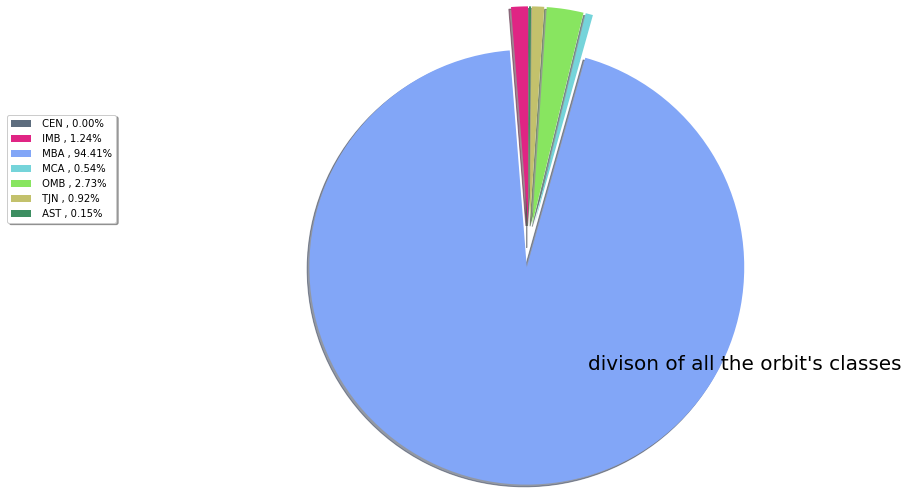

In [266]:
allvals = len(df_JPL)
classes_vals = [len(df_JPL[df_JPL['CEN']==1])/allvals,len(df_JPL[df_JPL['IMB']==1])/allvals,len(df_JPL[df_JPL['MBA']==1])/allvals,len(df_JPL[df_JPL['MCA']==1])/allvals,len(df_JPL[df_JPL['OMB']==1])/allvals,len(df_JPL[df_JPL['TJN']==1])/allvals,len(df_JPL[df_JPL['AST']==1])/allvals]
classes_index = [' CEN ' ,' IMB ',' MBA ',' MCA ',' OMB ',' TJN ',' AST ']
explodes = (0,0.2,0.2,0.2,0.2,0.2,0.2)
classes_colors = ['#5D6D7E','#e02584','#82a6f7','#75d4da','#88e560','#c3c16c','#3c8e61']

fig, axs = plt.subplots(1,1, figsize=(16,5))

axs.pie(classes_vals, autopct=None, shadow=True, startangle=90,
            explode = explodes,radius=2, colors=classes_colors,pctdistance=1.1,labeldistance=0.8, textprops={'fontsize':8})
labels = [f'{l}, {s*100:.2f}%' for l, s in zip(classes_index, classes_vals)]
axs.legend(labels=labels, shadow=True, bbox_to_anchor=(-1, 0, 0, 1))
fig.suptitle("divison of all the orbit's classes" ,fontsize = 20,x=0.7,y=0.2 )

As can be seen in the graph above, the MBA asteroids consume the most of our data, so we'll eliminate them and see if there's any correlation.

In [267]:
noMBADF = df_JPL.drop(labels=df_JPL[MBA]['MBA'].index)

noMBADF

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,...,NEO,PHA,CEN,IMB,MBA,MCA,OMB,TJN,AST,M
64,2000065,65 Cybele (A861 EB),3.425,0.1122,3.56,155.62,102.89,3.041,3.81,6.34,...,0,0,0,0,0,0,1,0,0,354.075862
75,2000076,76 Freia (A862 UA),3.415,0.1661,2.12,204.29,252.23,2.847,3.98,6.31,...,0,0,0,0,0,0,1,0,0,18.032807
86,2000087,87 Sylvia (A866 KA),3.482,0.0936,10.88,73.03,263.66,3.156,3.81,6.50,...,0,0,0,0,0,0,1,0,0,183.685122
106,2000107,107 Camilla (A868 WA),3.490,0.0650,10.00,172.58,306.20,3.263,3.72,6.52,...,0,0,0,0,0,0,1,0,0,57.543269
107,2000108,108 Hecuba (A869 GB),3.240,0.0560,4.22,349.95,206.81,3.059,3.42,5.83,...,0,0,0,0,0,0,1,0,0,75.209406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424970,2424971,424971 (2009 BY15),3.205,0.0215,11.93,126.49,354.30,3.136,3.27,5.74,...,0,0,0,0,0,0,1,0,0,23.433819
424971,2424972,424972 (2009 BV20),3.209,0.1094,19.68,117.83,121.20,2.858,3.56,5.75,...,0,0,0,0,0,0,1,0,0,278.524719
424980,2424981,424981 (2009 BM133),3.208,0.0856,6.54,139.62,54.81,2.933,3.48,5.75,...,0,0,0,0,0,0,1,0,0,331.004957
424984,2424985,424985 (2009 BR182),3.259,0.0450,7.57,154.17,139.31,3.112,3.41,5.88,...,0,0,0,0,0,0,1,0,0,215.275516


lets take now noMBADF and see how the does the NEO and PHA divides between the diffrent orbit types

In [268]:
def valscounter(types,nombadf):
    onevals = list()
    zerovals = list()
    for x in types:
        onevals.append(len(nombadf[(nombadf[x]==1) &(nombadf['PHA']==1)]))
        zerovals.append(len(nombadf[(nombadf[x]==1) &(nombadf['PHA']==0)]))
    
    return onevals,zerovals;

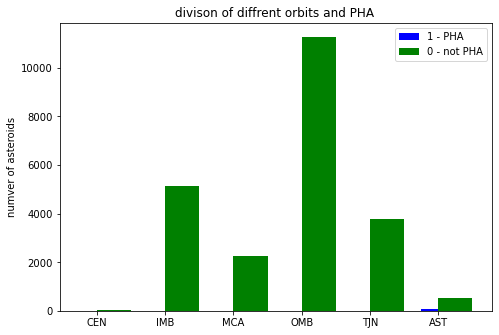

In [272]:
X = ['CEN','IMB','MCA','OMB','TJN','AST']

onevals,zerovals = valscounter(X,noMBADF)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Y = np.arange(6)
ax.bar(Y+0.00, onevals, color = 'b', width = 0.5)
ax.bar(Y+0.25, zerovals, color = 'g', width = 0.5)
ax.set_xticklabels(('','CEN','IMB','MCA','OMB','TJN','AST'))
plt.ylabel("numver of asteroids")
plt.title("divison of diffrent orbits and PHA ")
ax.legend(['1 - PHA','0 - not PHA'])

We divided the different orbit classes in the graph above into those that contain asteroid with potentially hazardous asteroid and those that do not. We will do the same for near-earth objects as well.

In [273]:
def valscounter1(types,nombadf):
    onevals = list()
    zerovals = list()
    for x in types:
        onevals.append(len(nombadf[(nombadf[x]==1) &(nombadf['NEO']==1)]))
        zerovals.append(len(nombadf[(nombadf[x]==1) &(nombadf['NEO']==0)]))
    
    return onevals,zerovals;

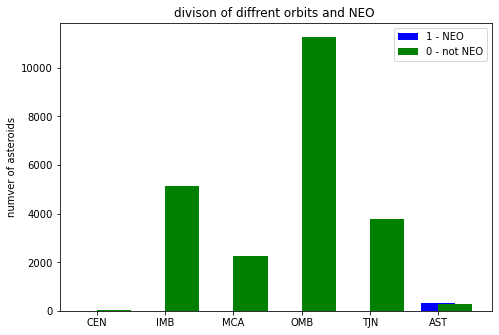

In [275]:
X = ['CEN','IMB','MCA','OMB','TJN','AST']

onevals1,zerovals1 = valscounter1(X,noMBADF)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Y = np.arange(6)
ax.bar(Y+0.00, onevals1, color = 'b', width = 0.5)
ax.bar(Y+0.25, zerovals1, color = 'g', width = 0.5)
ax.set_xticklabels(('','CEN','IMB','MCA','OMB','TJN','AST'))
plt.ylabel("numver of asteroids")
plt.title("divison of diffrent orbits and NEO ")
ax.legend(['1 - NEO','0 - not NEO'])

As we can see from the graph above there are only few NEO objects which are from AST ,these class is for orbits which are undefined unfortunately 

Let's continue with a pie chart showing **NEO** (Near-Earth Object) and **PHA** (Potentially Hazardous Asteroid) asteroids, so we can see how many are near Earth and how many are potentially deadly.

As can be seen from the graphs below, the majority of asteroids are far from Earth and pose no threat.





Text(0.5, 0.98, 'Near-Earth Objects and potentially hazardous asteroids')

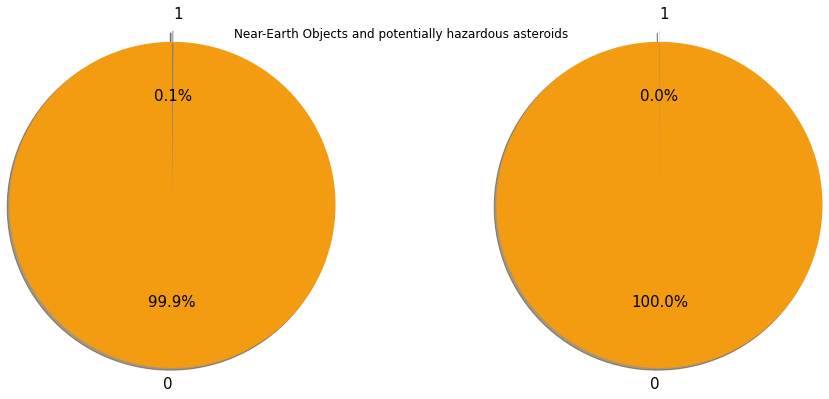

In [276]:
NEO_series = df_JPL['NEO'].value_counts()
NEO_values = NEO_series.values.tolist()
NEO_index = ['0', '1']
NEO_colors = ['#F39C12', '#5D6D7E']

PHA_series = df_JPL['PHA'].value_counts()
PHA_values = PHA_series.values.tolist()
PHA_index = ['0', '1']
PHA_colors = ['#F39C12', '#5D6D7E']

fig, axs = plt.subplots(1,2, figsize=(16,5))

axs[0].pie(NEO_values, labels=NEO_index, autopct='%1.1f%%', shadow=True, startangle=90,
           explode=(0.05, 0.05), radius=1.5, colors=NEO_colors, textprops={'fontsize':15})
axs[1].pie(PHA_values, labels=PHA_index, autopct='%1.1f%%', shadow=True,
           startangle=90, explode=(0.05, 0.05), radius=1.5, colors=PHA_colors, textprops={'fontsize':15})

fig.suptitle('Near-Earth Objects and potentially hazardous asteroids')




In [277]:
ct_NEO_PHA = pd.crosstab(df_JPL['NEO'], df_JPL['PHA'] ,normalize='index')
ct_NEO_PHA

PHA,0,1
NEO,,
0,1.000000,0.000000
1,0.771341,0.228659


As can be seen from the table above,there is a strong connection between asteroids which are close to Earth and aren't really dangerous. 

After removing a few(not many) outliers, we can see the connection between the aphelion distance and the period of an orbit to complete a round ,in the graph below.

We can see a linear correlation between the two variables.
We can now claim that the time it takes an asteroid to complete a round is dependent on how far it gets from the sun

aphelion distance -the point in the asteroid most distant from the Sun

Text(0.5, 1.0, 'the correlation between the aphelion distance and the period of an orbit to finish a round ')

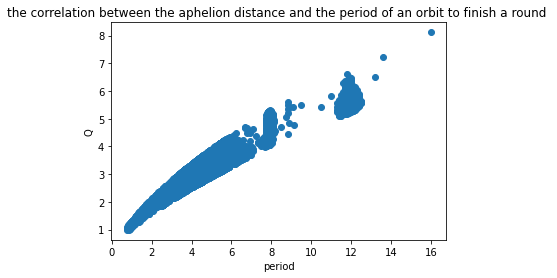

In [279]:
plt.scatter(df_JPL[df_JPL['period']<20]['period'],df_JPL[df_JPL['period']<20]['Q'])
plt.xlabel("period")
plt.ylabel("Q")
plt.title("the correlation between the aphelion distance and the period of an orbit to finish a round ")


after removing all the MBA data we get a nice correlation between **H** and **q** where **H** stands for the asteroid magnitude and **q** stands for the point where he is the nearest to the sun 

perihelion distance –the point in the orbit of asteroid that is nearest to the sun
magnitude - An object's absolute magnitude measure of the luminosity of a asteroid

we can see that in the graph below

Text(0.5, 1.0, 'the correlation between the magnitude and the nearest to the sun asteroids ')

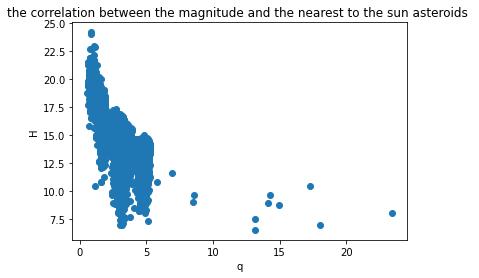

In [280]:
plt.scatter(noMBADF[(noMBADF['q']<50) & (noMBADF['H']>3)]['q'],noMBADF[(noMBADF['q']<50) & (noMBADF['H']>3)]['H'])
plt.xlabel("q")
plt.ylabel("H")
plt.title("the correlation between the magnitude and the nearest to the sun asteroids ")


that imples that when an asteroids is really close to the sun is magnutide tend to become the highest 
and when he is far from the sun is magnutide tend to be lowest which is kind of makes sense

in the graph below we can see the time it takes for an asteroid to finish an orbit in correlation to his size
we can see that we can actually divide into two groups where y=x can split the data
the graph below shows us that... **NOT** as we tend to think that if the asteroid is small it will take him less time to finish an orbit but it includes more paramters

Text(0.5, 1.0, 'the correlation between the diameter and the time it takes an asteroid orbit ')

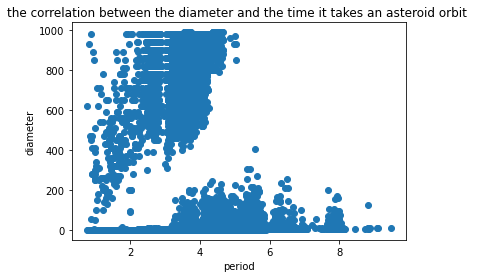

In [281]:
plt.scatter(df_JPL[df_JPL['period']<10]['period'],df_JPL[df_JPL['period']<10]['diameter'])
plt.xlabel("period")
plt.ylabel("diameter")
plt.title("the correlation between the diameter and the time it takes an asteroid orbit ")


We normalize **a** and add it to the graph below. Now we can see the areas of the graph that are brighter, indicating that **a** is SMALLER, indicating that it is closest to the sun.

We can plainly see as big as **a** as big as the period in the graph below, which suggests that the further an asteroid is from the sun, the longer it will take him to complete a cycle. This makes sense because the cycle radius is bigger...

We reasoned that if the asteroid were larger, it would take him longer to complete a cycle, but because we are dealing with space objects, gravity is present, and we can detect anomalies in the data, such as small objects taking longer to complete a cycle.

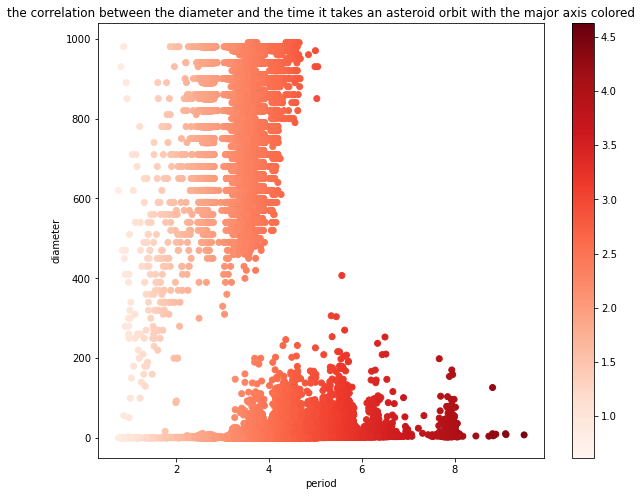

In [282]:
plt.figure(figsize=((10,8)))
cmap = plt.cm.Reds
norm = plt.Normalize(vmin=0.615900, vmax=4.627000)
plt.scatter(x=df_JPL[df_JPL['period']<10]['period'],y=df_JPL[df_JPL['period']<10]['diameter'] ,c=cmap(norm(df_JPL[df_JPL['period']<10]['a'])))
plt.xlabel("period")
plt.ylabel("diameter")
plt.title("the correlation between the diameter and the time it takes an asteroid orbit with the major axis colored")
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap , norm = norm))
plt.show()

Now, in the table below, there is a good correlation between diameter and magnitude, which makes sense because we expect the magnitude to be as large as the diameter. Let's plot that out.

In [283]:
df_JPL[['diameter','H']].corr()

,diameter,H
diameter,1.000000,0.455286
H,0.455286,1.000000


Text(0.5, 1.0, 'the correlation between the diameter and his magnitude ')

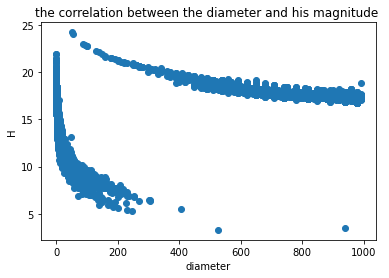

In [284]:
plt.scatter(df_JPL[df_JPL['diameter']<1000]['diameter'],df_JPL[df_JPL['diameter']<1000]['H'])
plt.xlabel("diameter")
plt.ylabel("H")
plt.title("the correlation between the diameter and his magnitude ")


We can see that huge asteroids dont have necessarily the biggest magntiude. Perhaps we could try again with another variable.
I believe that the perihelion distance (i.e. **q** ) will assist us because it distinguishes the closest point to the sun, and the closer the asteroid is to the sun, the higher the magnutide should rise.

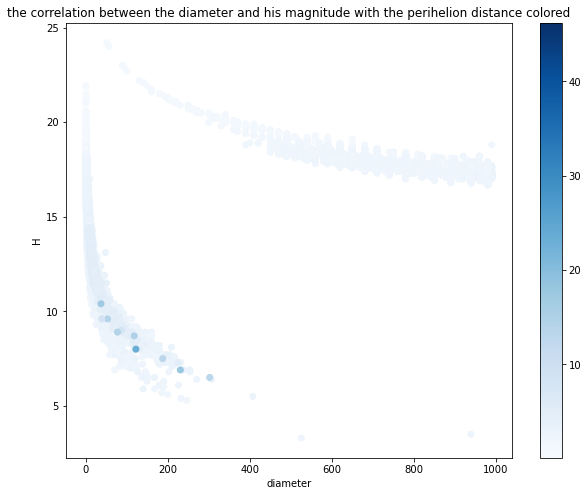

In [285]:
plt.figure(figsize=((10,8)))
cmap = plt.cm.Blues
norm = plt.Normalize(vmin=0.082000, vmax=46.198000)
plt.scatter(df_JPL[df_JPL['diameter']<1000]['diameter'],df_JPL[df_JPL['diameter']<1000]['H'] ,c=cmap(norm(df_JPL[df_JPL['diameter']<1000]['q'])))
plt.xlabel("diameter")
plt.ylabel("H")
plt.title("the correlation between the diameter and his magnitude with the perihelion distance colored")
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap , norm = norm))
plt.show()


And indeed, we got what we said: the bluer the color, the further the asteroid is from the sun, and therefore its magnitude is smaller. As you can see, the diameter has no impact on our magnitude; instead, it is determined by the perihelion distance.

lets try and graph the magnitude and the perihelion distance.
such that the perihelion distance normalized and we will see that as closest to the sun the magnitude rise

In [ ]:
plt.figure(figsize=((10,8)))
norm = plt.Normalize(vmin=df_JPL[df_JPL['q']<50]['q'].min(), vmax=df_JPL[df_JPL['q']<50]['q'].max())
plt.scatter(norm(df_JPL[df_JPL['q']<50]['q']),df_JPL[df_JPL['q']<50]['H'])
plt.xlabel("q")
plt.ylabel("H")
plt.title("the correlation between the magnitude of an asteroid and his closest point to the sun")

plt.show()


we can see in the graph above that the farthest asteroid from the sun become so his magnuitde drops 

Let's take a closer look at the asteroid's orbit; **e** is a crucial factor in classifying asteroids' orbits, so let's dig a little further.
A circular orbit is formed by asteroids with a value of 0, an elliptic orbit is formed by asteroids with values between 0 and 1, a parabolic escape orbit is formed by asteroids with a value more than 1, and a hyperbola is formed by asteroids with a value more than 1.

First i wanted to split **e** between **e** == 0 , 0<**e**<1 and **e** >=1 but it didnt yield any result so then i tried to divide it into bins and see if we can get any result from that to try and classify the orbit with **e** values 

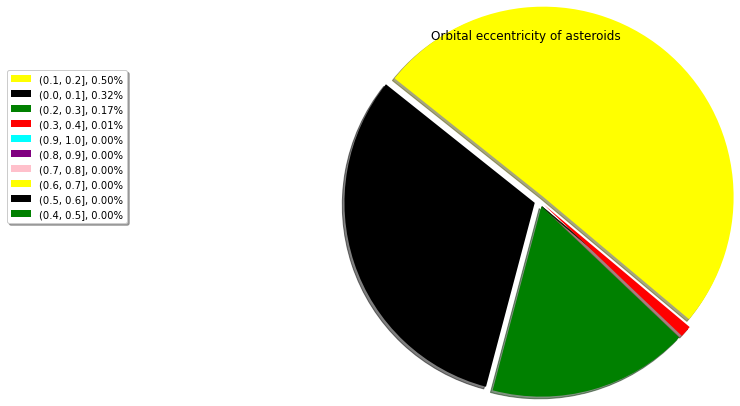

In [286]:
e_distribution = df_JPL.e.value_counts(bins = [0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] ,normalize = True)
e_indexs = e_distribution.keys().astype('str')
e_colors = ['yellow','black','green','red','cyan','purple','pink']

fig, axs = plt.subplots(1, 1 ,figsize=(16,5))
labels = [f'{l}, {s:.2f}%' for l, s in zip(e_indexs, e_distribution)]
axs.pie(e_distribution, autopct=None, shadow=True,
           explode= (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05),startangle=320, radius=1.75, colors=e_colors )

fig.suptitle('Orbital eccentricity of asteroids')
axs.legend(labels=labels, shadow=True, bbox_to_anchor=(-1, 0, 0, 1),fontsize=10)

Now we can see clearly that more asteroids have an orbit of between (0.1,0.2] ann then (0.0,0.1] other then that is all the other groups,but it doesnt yield much information

let's save our new categorized dataframe

In [287]:
df_JPL.to_csv('df_JPLfinalwithcategories.csv', index=False)

An Additon:
=
I want to try and plot the orbit itself so i used **Poliastro**
poliastro is an open source pure Python library for interactive Astrodynamics and Orbital Mechanics, with a focus on ease of use, speed, and quick visualization. It provides a simple and intuitive API, and handles physical quantities with units.

for the orbit plot we need:
Semimajor axis (a). ==> **a**

Eccentricity (e). ==> **e**

Inclination (i). ==> **i**

Right ascension of the ascending node (Ω). ==> **Node**

Argument of pericenter (ω). ==> **Peri**

True anomaly (ν).==> **M**

we unfortunately didn't acquiesced **True anomaly** varibale thus, we will get it from JPL using csv I downloaded from there

In [288]:
df_M = pd.read_csv("TrueAnomalyVALS.csv")

df_JPL["M"]=df_M["ma"][:425000]

df_JPL['M'].isnull().sum() ##no NaNs

df_JPL

,SPK-ID,object fullname,a,e,i,node,peri,q,Q,period,...,NEO,PHA,CEN,IMB,MBA,MCA,OMB,TJN,AST,M
0,2000001,1 Ceres (A801 AA),2.766,0.0782,10.59,80.27,73.72,2.550,2.98,4.60,...,0,0,0,0,1,0,0,0,0,205.545416
2,2000003,3 Juno (A804 RA),2.668,0.2570,12.99,169.85,248.03,1.982,3.35,4.36,...,0,0,0,0,1,0,0,0,0,170.711245
3,2000004,4 Vesta (A807 FA),2.362,0.0884,7.14,103.81,150.92,2.153,2.57,3.63,...,0,0,0,0,1,0,0,0,0,258.567830
4,2000005,5 Astraea (A845 XA),2.574,0.1908,5.37,141.57,358.63,2.083,3.06,4.13,...,0,0,0,0,1,0,0,0,0,65.612382
5,2000006,6 Hebe (A847 NA),2.425,0.2033,14.74,138.64,239.71,1.932,2.92,3.78,...,0,0,0,0,1,0,0,0,0,242.944820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424995,2424996,424996 (2009 CZ40),3.169,0.1102,9.40,140.76,273.09,2.820,3.52,5.64,...,0,0,0,0,1,0,0,0,0,103.361937
424996,2424997,424997 (2009 CH45),2.987,0.1178,8.14,324.59,79.77,2.635,3.34,5.16,...,0,0,0,0,1,0,0,0,0,172.179562
424997,2424998,424998 (2009 CU48),3.172,0.0740,11.88,307.42,319.26,2.937,3.41,5.65,...,0,0,0,0,1,0,0,0,0,263.203058
424998,2424999,424999 (2009 CB58),3.148,0.0686,13.82,177.56,273.23,2.932,3.36,5.59,...,0,0,0,0,1,0,0,0,0,105.943410


Now we can create an orbit,all orbits are in prespective to the Sun,lets create one for example,but firsst lets check we have all the data

In [289]:
df_JPL['M'].isnull().value_counts()

False    414021
Name: M, dtype: int64

In [290]:
a=df_JPL['a'][0]*u.AU
e=df_JPL['e'][0]*u.one
i=df_JPL['i'][0]*u.deg
Node=df_JPL['node'][0]*u.deg
Peri=df_JPL['peri'][0]*u.deg
M=df_JPL['M'][0]*u.deg
orb = Orbit.from_classical(Sun, a, e, i, Node, Peri, M)

orb.plot(interactive = True,use_3d=True)


We can also plot the orbit as 2D orbit with 2 orbits together

In [294]:
a=df_JPL['a'][2]*u.AU
e=df_JPL['e'][2]*u.one
i=df_JPL['i'][2]*u.deg
Node=df_JPL['node'][2]*u.deg
Peri=df_JPL['peri'][2]*u.deg
M=df_JPL['M'][2]*u.deg
orb1 = Orbit.from_classical(Sun, a, e, i, Node, Peri, M)

op1=OrbitPlotter2D()


op1.plot(orb, label="Initial orbit")
op1.plot(orb1, label="Transfer orbit")





In [293]:
op = OrbitPlotter3D()
op.plot(orb, label="Initial orbit")
op.plot(orb1, label="Transfer orbit")